In [12]:
%matplotlib inline

import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [8]:
N = 512 # table size
fs = 48000
fmax = 500
T = 1.0/fmax*fs
print("%dHz signal at fs=%dHz has period %.2f samples" % (fmax, fs, T))

wmax = fmax/(fs/2)
# we can go up to w=0.5 max, let's play safe (due to the numeric errors) and limit this to 0.4
npartials = round(0.4/wmax)
print("Max number of partials for %.2f signal, without aliasing, is %d" % (fmax, npartials))

500Hz signal at fs=48000Hz has period 96.00 samples
Max number of partials for 500.00 signal, without aliasing, is 19


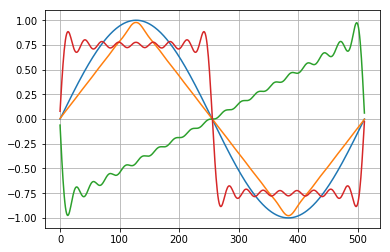

In [13]:
def waveform(wave, N, partials=10):
    sig = np.zeros(N)
    A = 1
    for n in range(partials):
        an = 0
        bn = 0
        if wave=='sawtooth':
            
            if n>0:
                bn = -math.sqrt(3) * A/math.pi/n*(-1)**n
            else:
                continue
        elif wave=='triangle':
            if n%2==1:
                an = 4 * A*(1-(-1)**n)/(math.pi**2 * n**2)
            else:
                continue
        elif wave=='square':
            dc = 0.5
            if n==0:
                an = 0
            elif n%2==1:
                an = 3.0 * A/(n*math.pi)*math.sin(n*math.pi*dc)
            else:
                continue;
        sig += an*np.cos(np.linspace(0, n*2*math.pi, N)) + bn*np.sin(np.linspace(0, n*2*math.pi, N))
    roll = 0
    if wave=='sawtooth':
        roll = round(N/2.0)
    elif wave=='triangle':
        roll = round(N/4.0)
    elif wave=='square':
        roll = round(N/4.0)
    return np.roll(sig, roll)

wfs = ('sine', 'triangle', 'sawtooth', 'square')
signal = {'sine': np.sin(np.linspace(0, 2*math.pi, N))}
for wf in wfs[1:]:
    signal[wf] = waveform(wf, N, npartials)
    
for wf, sig in signal.items():
    plt.plot(sig)
plt.grid()
#plt.legend(['sine (ref)', 'triangle', 'sawtooth', 'square'])


In [10]:
print("float wavetable[4][%d] = {"%(N,))
for wf, sig in signal.items():
    print("\t// " + wf)
    print("\t{%s}," % (', '.join(["%.6f"%(v) for v in sig]),))
print("};")

float wavetable[4][512] = {
	// sine
	{0.000000, 0.012296, 0.024589, 0.036879, 0.049164, 0.061441, 0.073708, 0.085965, 0.098208, 0.110437, 0.122649, 0.134842, 0.147016, 0.159166, 0.171293, 0.183394, 0.195467, 0.207511, 0.219523, 0.231502, 0.243446, 0.255353, 0.267222, 0.279050, 0.290836, 0.302578, 0.314275, 0.325923, 0.337523, 0.349071, 0.360567, 0.372008, 0.383393, 0.394720, 0.405988, 0.417194, 0.428336, 0.439415, 0.450426, 0.461370, 0.472244, 0.483046, 0.493776, 0.504430, 0.515009, 0.525509, 0.535931, 0.546271, 0.556528, 0.566702, 0.576790, 0.586790, 0.596702, 0.606524, 0.616253, 0.625890, 0.635432, 0.644878, 0.654227, 0.663477, 0.672626, 0.681674, 0.690618, 0.699458, 0.708193, 0.716820, 0.725339, 0.733748, 0.742047, 0.750233, 0.758306, 0.766264, 0.774106, 0.781831, 0.789439, 0.796926, 0.804293, 0.811539, 0.818662, 0.825661, 0.832535, 0.839284, 0.845905, 0.852399, 0.858764, 0.864999, 0.871103, 0.877076, 0.882916, 0.888622, 0.894194, 0.899631, 0.904932, 0.910096, 0.915122, 0.920010, 0